# PSYC 193: Perception and Computation 
## Lab 1: Working with image data and analyzing typicality ratings

In this lab, we will be working with an image dataset used in a recent computer vision paper by [Sangkloy et al.](https://dl.acm.org/doi/abs/10.1145/2897824.2925954). 

**Learning objectives**
* Learn the basics of working with image data
* Analyze human typicality rating data 

**Submission instructions**
1. Please rename the notebook by replacing `YOURUSERNAME` in the filename with your actual UCSD AD username. 
2. Before submitting your assignment, sure that your notebook can run from "top to bottom," executing the code in every code cell without returning fatal errors. An easy way to verify this is to click "Kernel" above in the tool bar, and try selecting "Restart & Run All."
3. Once you have verified that your notebook can run "top to bottom" without issues, click "File" in the toolbar above, then "Download as," then "PDF via LaTeX" to download a PDF version of your notebook. 
4. Send this PDF version of your notebook to Judy's email before 5pm (PST) the next class period. 

#### Getting started with jupyter notebooks
If you are relatively new to writing Python code in jupyter notebooks, it's recommended that you check out the User Interface tour. Click Help in the toolbar. 

### setup

In [1]:
## load generally useful python modules
import os
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### load in datasets

In [2]:
## import image metadata (from Sangkloy et al. (2016))
from photodraw32_metadata import metadata
M = pd.DataFrame(metadata)

In [3]:
## inspect what image metadata looks like using the pandas `head` function:
## see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

M.head()

,category,index,sketchy_preprocessing_mode,sketchy_filepath,sketchy_filename,photodraw32_filename,s3_filename,s3_url,batch_num
0,airplane,00,tx_000100000000,photodraw32_stims\airplane\n02691156_359.png,n02691156_359.png,airplane_00,n02691156_359_airplane_00.png,https://photodraw32.s3.amazonaws.com/n02691156...,5
1,airplane,01,tx_000100000000,photodraw32_stims\airplane\n02691156_507.png,n02691156_507.png,airplane_01,n02691156_507_airplane_01.png,https://photodraw32.s3.amazonaws.com/n02691156...,4
2,airplane,02,tx_000100000000,photodraw32_stims\airplane\n02691156_573.png,n02691156_573.png,airplane_02,n02691156_573_airplane_02.png,https://photodraw32.s3.amazonaws.com/n02691156...,0
3,airplane,03,tx_000100000000,photodraw32_stims\airplane\n02691156_987.png,n02691156_987.png,airplane_03,n02691156_987_airplane_03.png,https://photodraw32.s3.amazonaws.com/n02691156...,3
4,airplane,04,tx_000100000000,photodraw32_stims\airplane\n02691156_1692.png,n02691156_1692.png,airplane_04,n02691156_1692_airplane_04.png,https://photodraw32.s3.amazonaws.com/n02691156...,0


**What do you think each row of this dataframe represents?**

*Each row represents an image.*

### explore dataset

**How many different images are there in this dataframe?**

*There are 1024 images in this dataframe.*

hint: try using the `shape` function

In [4]:
### INSERT YOUR CODE HERE ####
num_images = M.shape[0]
print(num_images)

1024


**How many different object categories are represented in the image dataset? (i.e., M dataframe)**

*There are 43 object categories represented in the image dataset.*

hint: try using the `nunique` function

In [5]:
### INSERT YOUR CODE HERE ####
num_categories = M['category'].nunique()
print(num_categories)

32


**How many different images per category are in this dataset?**

*There are 32 different images per category in this dataset.*

hint: try using `groupby` and `count` or `value_counts`

In [6]:
### INSERT YOUR CODE HERE ####
# using 'value_counts'
numberOfImages = M['category'].value_counts() 
print(numberOfImages)

scorpion          32
windmill          32
castle            32
snake             32
elephant          32
lion              32
axe               32
fish              32
bread             32
jellyfish         32
ray               32
tree              32
saw               32
raccoon           32
skyscraper        32
motorcycle        32
mushroom          32
ape               32
hotdog            32
car_(sedan)       32
piano             32
jack-o-lantern    32
airplane          32
flower            32
butterfly         32
blimp             32
kangaroo          32
squirrel          32
cup               32
window            32
hat               32
cat               32
Name: category, dtype: int64


### load and display a single image

**Here is sample code to display one of the "airplane" images in the dataset**

Example Image URL: https://photodraw32.s3.amazonaws.com/n02691156_359_airplane_00.png


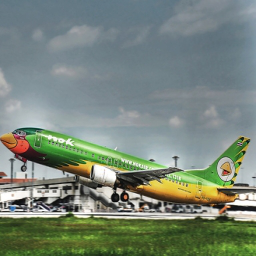

In [7]:
url = M['s3_url'].values[0] 
print('Example Image URL: {}'.format(url))
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

**Now display any one of the "lion" images in the dataset**

In [8]:
## INSERT YOUR CODE HERE ##

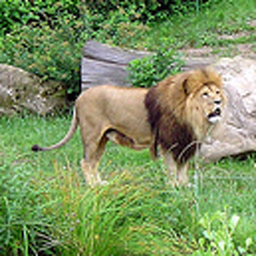

In [9]:
lion_index = M.loc[M['category'] == 'lion'].index[0]
url_lion = M['s3_url'].values[lion_index]
response_lion = requests.get(url_lion) 
img_lion = Image.open(BytesIO(response_lion.content))
img_lion

### Practice with image processing

**What are the dimensions of the example airplane image from above (i.e., width x height x num_channels)?**

hint: Try looking up how to get sizes of images using the Python Imaging Library (PIL)

*The dimensions of the example airplane image is 256 x 256 pixels*

In [10]:
## INSERT YOUR CODE HERE ##

In [11]:
airplane_index = M.loc[M['category'] == 'airplane'].index[0]
url_airplane = M['s3_url'].values[airplane_index]
response_airplane = requests.get(url_airplane) 
img_airplane = Image.open(BytesIO(response_airplane.content))
img_airplane
print(img_airplane.size)

(256, 256)


**Convert image data to a NumPy array. What are its dimensions?**

*Its dimension is 256 x 256 x 3.*

In [12]:
## INSERT YOUR CODE HERE ##

In [13]:
airplane_arr = np.array(img_airplane)
print(airplane_arr.ndim)
print(airplane_arr.shape)

3
(256, 256, 3)


**Inspect the values in the array. What do these values represent? What is the largest value, and what is the smallest value in the image array?**

Is the range of values what you expected? Check out [this page on 8-bit color graphics](https://en.wikipedia.org/wiki/8-bit_color) to learn more about this way of storing information about images. 

*The largest value is 255. The smallest value is 0. They are within the range of values based on the rule of 8-bit color graphics because these values are within the range of 2^8 (i.e., 256).*

In [14]:
## INSERT YOUR CODE HERE ##
print(airplane_arr.max())
print(airplane_arr.min())

255
0


**Crop the middle 100x100 pixels from the image and display it.**

hint: Try using the `crop` function from PIL. Use the information you extracted earlier about the width and height of the image to determine where the middle 100x100 pixels are.

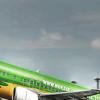

In [15]:
## INSERT YOUR CODE HERE ##

airplane_width = 100
airplane_height = 100
airplane_pixel_location = (np.array(airplane_arr.shape[0]) - airplane_width) / 2

img_airplane.crop((airplane_pixel_location,airplane_pixel_location,
          airplane_pixel_location+airplane_width,airplane_pixel_location+airplane_height))


### analyze distribution of ratings 

In [16]:
## import image typicality ratings (from an unpublished dataset)
T = pd.read_csv('photodraw32_ratings.csv')

In [17]:
## inspect the dataframe using the `head` function
## INSERT YOUR CODE HERE ##
T.head()

,prolificID,img_id,category,trialNum,ratings,enumerated_ratings
0,5d87df4202971700016068c8,https://photodraw32.s3.amazonaws.com/n01447331...,fish,9,Very,1
1,5865dd647fbbcd00013973b8,https://photodraw32.s3.amazonaws.com/n01447331...,fish,53,Very,1
2,5e793ab51aff8103623757be,https://photodraw32.s3.amazonaws.com/n01447331...,fish,102,Very,1
3,5ec7bb4467b0da23311bd127,https://photodraw32.s3.amazonaws.com/n01447331...,fish,126,Moderately,0
4,5e8bce371e16e90ba6df085d,https://photodraw32.s3.amazonaws.com/n01447331...,fish,49,Very,1


#### Here is what the columns mean
* prolificID: anonymized participant identifier
* img_id: URL of image shown to participant
* category: category this image belongs to
* ratings: rating given by participants on 5-point scale from "Not typical at all" to "Extremely" typical
* enumerated_ratings: ratings converted to numeric scale ranging between -2 and +2

**How many ratings do we have per image?**

*10 ratings per image.*

In [18]:
## INSERT YOUR CODE HERE ##
T.groupby(by = 'img_id').count()['ratings'][0]

10

**What does the distribution of ratings look like overall, across all images and categories?**

hint: for a basic histogram, try using matplotlib `plt.hist()`. For another option, try using plotting functions from [seaborn](https://seaborn.pydata.org/tutorial/distributions.html).

*The distribution of ratings are dense at the highest value (i.e., 2) and decreases as the typicality rating goes down. *

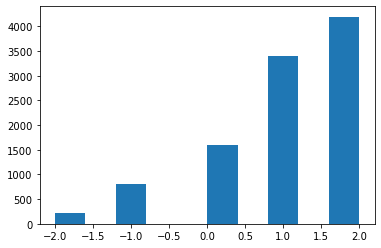

In [19]:
## INSERT YOUR CODE HERE ##

T_enu = T['enumerated_ratings']
T_arr = np.array(T_enu)
# using 'plt.hist'
plt.hist(T_arr)
plt.show()

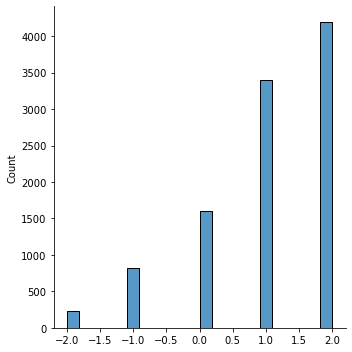

In [20]:
# using seaborn 
sns.displot(T_arr)

**What does the distribution of average ratings look like for images within each category?**

hint: try using `FacetGrid` from [seaborn](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

*The distribution of average ratings for each category seem to be also be dense at the higher typicality value (i.e., 2) within each category and decreases as the typicality rating goes down. Meaning that most images within each category were probably pretty typical. 'hotdog' and 'mushrooms' are 2 exceptions that have even distribution of average ratings, meaning that images within these 2 categories varied in typicality quite a lot.*

In [21]:
# make a new dataframe with only selected value to manipulate
T_avg = T[['category','img_id', 'enumerated_ratings']]
# mutate T_avg
T_avg = T_avg.groupby('img_id').agg({'enumerated_ratings':'mean', 'category':'first'})
# inspect the dataframe
T_avg.head()

,enumerated_ratings,category
img_id,,
https://photodraw32.s3.amazonaws.com/n01447331_2001_fish_09.png,1.0,fish
https://photodraw32.s3.amazonaws.com/n01496331_11015_ray_17.png,-0.2,ray
https://photodraw32.s3.amazonaws.com/n01496331_1104_ray_01.png,-0.4,ray
https://photodraw32.s3.amazonaws.com/n01496331_11647_ray_19.png,0.0,ray
https://photodraw32.s3.amazonaws.com/n01496331_12211_ray_20.png,-0.1,ray


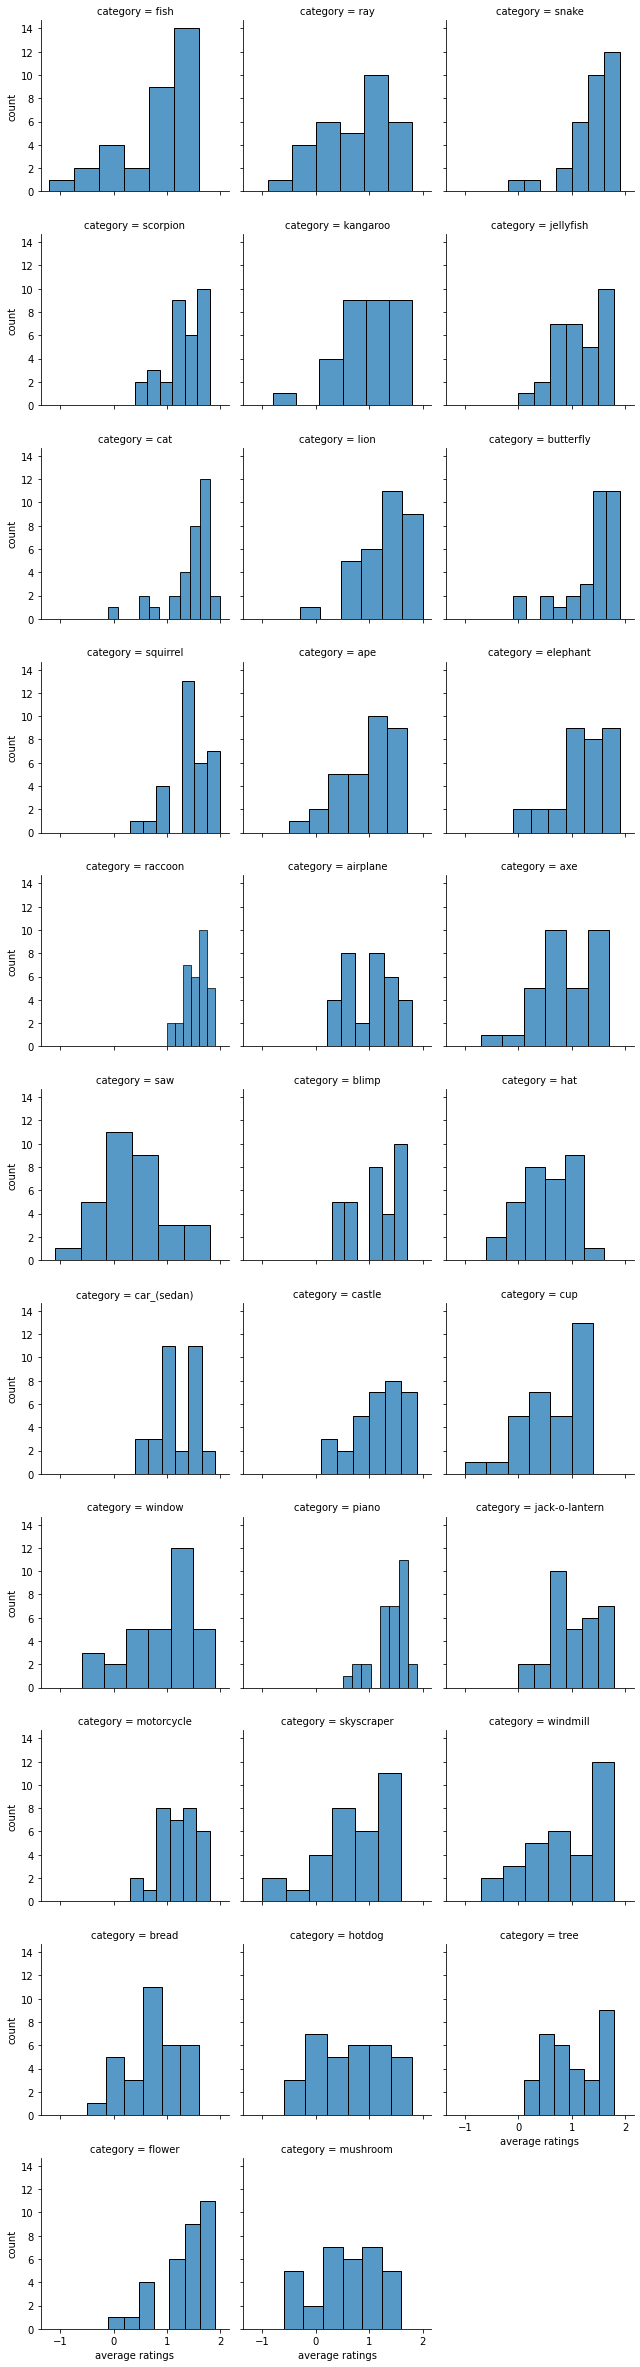

In [22]:
# plotting using seaborn
g = sns.FacetGrid(T_avg, col = 'category', col_wrap = 3, margin_titles=False)
g.map_dataframe(sns.histplot, 'enumerated_ratings')
g.set_axis_labels("average ratings", "count")

**How well do participants agree with one another on what rating to give to an image? Or, relatedly, how variable are the ratings given by different participants to the same image?**

hint: There isn't a single way to get at this question. Try to think about some metrics that might be useful, taking into account how often participants agree, and/or how large differences in ratings given between different participants are. 

*Given the range of ratings (-2 to 2), participants disagree on their ratings based on the standard deviation distribution. *

In [23]:
## INSERT YOUR CODE HERE ##

# make a new dataframe 
T_std = T[['category','img_id', 'enumerated_ratings']]
# mutate T_std to get standard deviation for all images 
T_std = T_std.groupby('img_id').agg({'enumerated_ratings':'std', 'category':'first'})
# inspecting the dataframe
T_std.head()

,enumerated_ratings,category
img_id,,
https://photodraw32.s3.amazonaws.com/n01447331_2001_fish_09.png,0.666667,fish
https://photodraw32.s3.amazonaws.com/n01496331_11015_ray_17.png,1.229273,ray
https://photodraw32.s3.amazonaws.com/n01496331_1104_ray_01.png,1.349897,ray
https://photodraw32.s3.amazonaws.com/n01496331_11647_ray_19.png,1.247219,ray
https://photodraw32.s3.amazonaws.com/n01496331_12211_ray_20.png,1.370320,ray


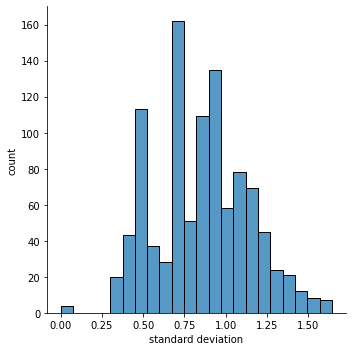

In [24]:
# plotting varince for all figures in the dataset
overall_std = sns.displot(T_std['enumerated_ratings'])
overall_std.set(xlabel='standard deviation', ylabel='count')

**How much variation is there in typicality ratings between images within each category?**

hint: What are some metrics you know about to quantify variation?

*Most categories have some variation in its typicality ratings. 'cat', 'lion', and 'squirrel' are the only categories that contain images where all participants agree on typicality ratings.*

In [25]:
## INSERT YOUR CODE HERE ##

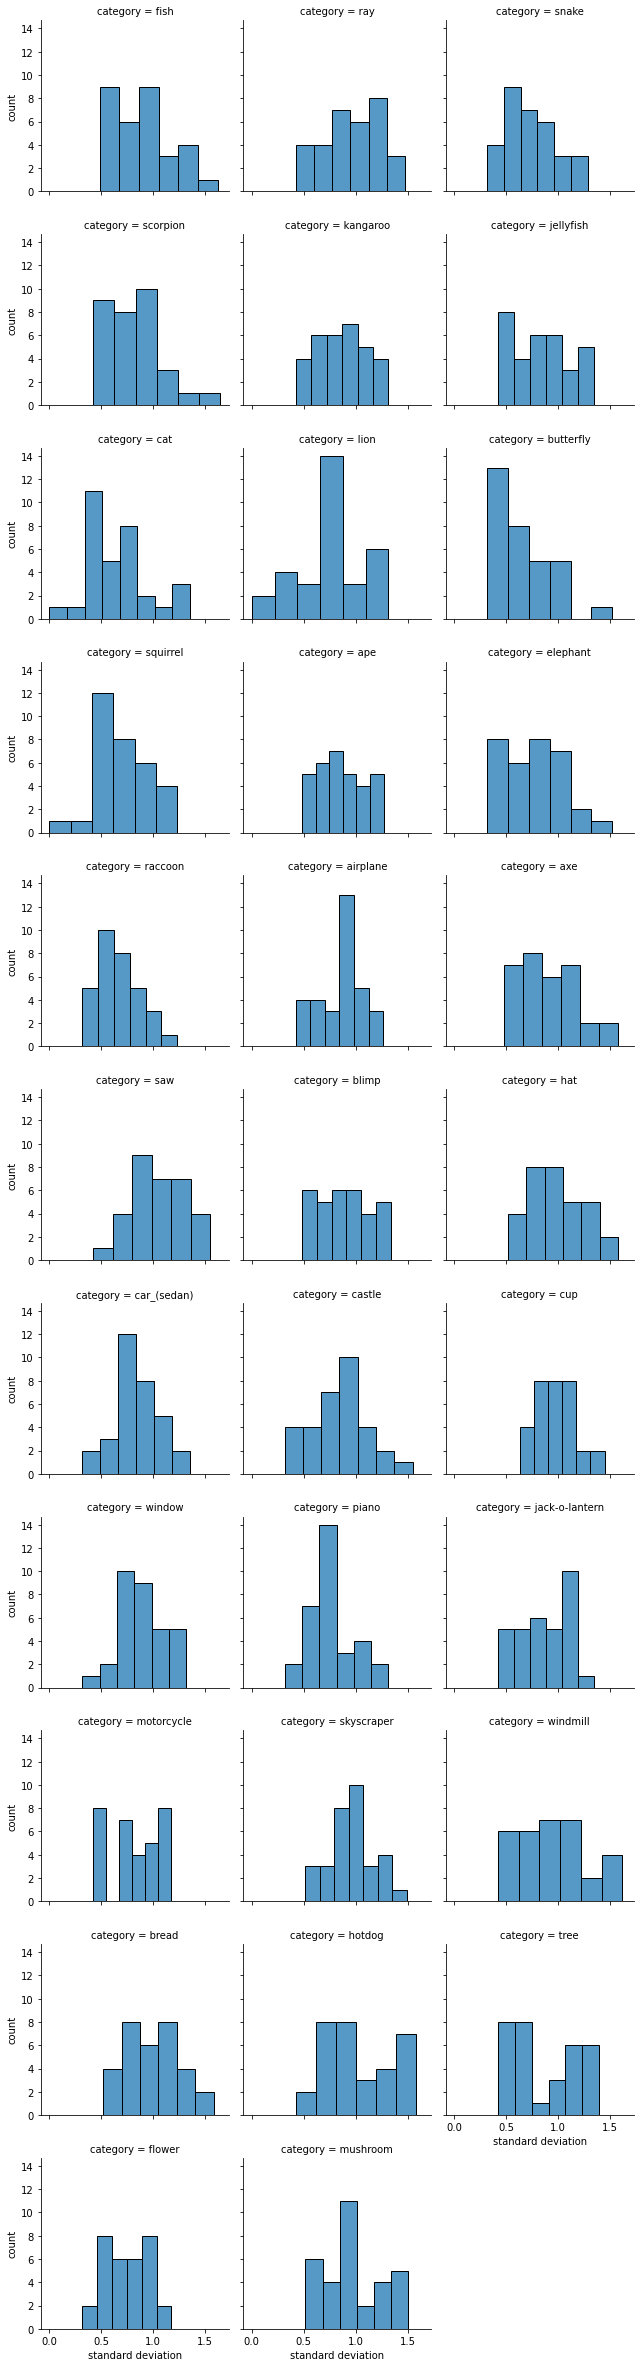

In [26]:
# plotting using seaborn
g = sns.FacetGrid(T_std, col = 'category', col_wrap = 3, margin_titles=True)
g.map_dataframe(sns.histplot, 'enumerated_ratings')
g.set_axis_labels("standard deviation", "count")

**How much variation is there in typicality ratings between categories?**

*There is not much variation in typicality ratings between categories but I only calculated the standard deviation for average ratings within each category here. A one-way anova might be a better and more scientificatly correct approach here.*

In [27]:
## INSERT YOUR CODE HERE ##

# making a new dataframe that has variance for each cateory
T_catstd = T_avg.groupby(['category']).std()
# inspect dateframe
T_catstd.head()

,enumerated_ratings
category,
airplane,0.455079
ape,0.558286
axe,0.590166
blimp,0.427566
bread,0.509813


Text(0, 0.5, 'standard deviation')

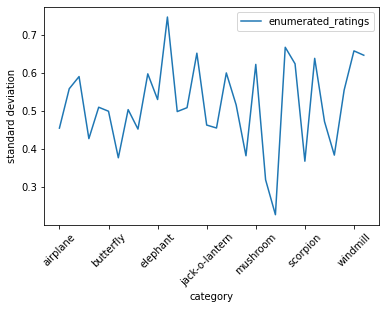

In [28]:
# plotting how variances distribute between category
T_catstd.plot()
plt.xticks(rotation=45)
plt.ylabel("standard deviation")

**What are some examples of `lion` images that are rated as being highly typical? What about the least typical? Display them below** 

example of a highly typical lion:


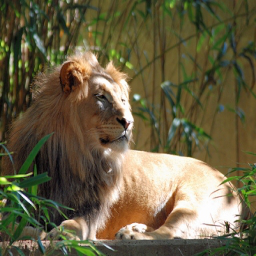

In [29]:
## INSERT YOUR CODE HERE ##

# creating a new dataframe for category lion
T_lion = T_avg[T_avg['category']=='lion']
# sort the dataframe with initial index with highest typicality rating
T_lion = T_lion.sort_values(by=['enumerated_ratings'], ascending = False)
# plotting some typical lions
typical_lion_1 = requests.get(T_lion.iloc[0].name) 
img_typical_lion_1 = Image.open(BytesIO(typical_lion_1.content))
print("example of a highly typical lion:")
img_typical_lion_1

example of a highly typical lion:


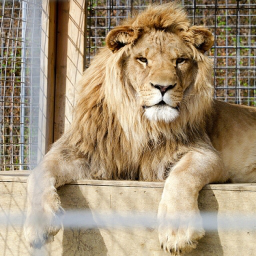

In [30]:
# repeating previous step
typical_lion_2 = requests.get(T_lion.iloc[1].name) 
img_typical_lion_2 = Image.open(BytesIO(typical_lion_2.content))
print("example of a highly typical lion:")
img_typical_lion_2

example of a highly typical lion:


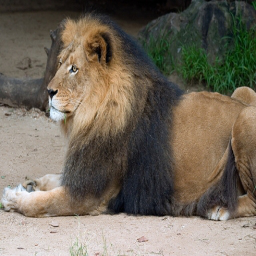

In [31]:
# repeating previous step
typical_lion_3 = requests.get(T_lion.iloc[2].name) 
img_typical_lion_3 = Image.open(BytesIO(typical_lion_3.content))
print("example of a highly typical lion:")
img_typical_lion_3

example of the least typical lion:


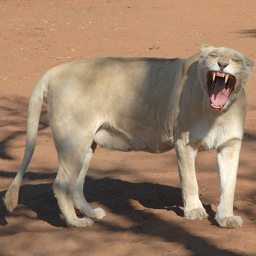

In [32]:
# repeating previous step but for least typical lions now
nontypical_lion_1 = requests.get(T_lion.iloc[-1].name) 
img_typical_nontypical_lion_1 = Image.open(BytesIO(nontypical_lion_1.content))
print("example of the least typical lion:")
img_typical_nontypical_lion_1

example of a non typical lion:


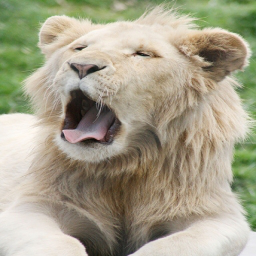

In [33]:
# repeating previous step 
nontypical_lion_2 = requests.get(T_lion.iloc[-2].name) 
img_typical_nontypical_lion_2 = Image.open(BytesIO(nontypical_lion_2.content))
print("example of a non typical lion:")
img_typical_nontypical_lion_2

example of a non typical lion:


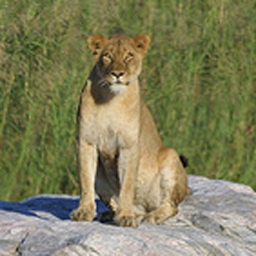

In [34]:
# repeating previous step 
nontypical_lion_3 = requests.get(T_lion.iloc[-3].name) 
img_typical_nontypical_lion_3 = Image.open(BytesIO(nontypical_lion_3.content))
print("example of a non typical lion:")
img_typical_nontypical_lion_3

**Try to construct a 4 row x 8 column "image gallery" that displays all of the `lion` images from the most typical ones in top left to the least typical on the bottom right, where each image appears with the average rating it earned above it. Do the results make sense to you? Try to write your visualization code so that you can easily substitute a different category label other than `lion`.**

*The results make sense to me for the most part. The lions with higher typicality ratings do look more like lions but the lions with lower typicalit ratings also look just like regular lions to me. All of the images in this category are already known to be lions, so for me personally I feel like I would have a hard time rating them to be non-typical.*

In [35]:
## INSERT YOUR CODE HERE ##

# making a function to customize category label and gallery size
def image_gallery(target_label, row, column):
    '''
    input: 
        label str, row and column num
    output:
        plt gallery
    '''
    T_target = T_avg[T_avg['category']==target_label]
    T_target = T_target.sort_values(by=['enumerated_ratings'], ascending = False)
    width = 20
    height = 10
    fig = plt.figure(figsize = (width, height))
    for i in range(0, column*row):
        cur_url = T_target.iloc[i].name
        response = requests.get(cur_url) 
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(row, column, i+1)
        plt.axis("off")
        plt.title(T_target.iloc[i][0])
        plt.imshow(img)
    plt.show()

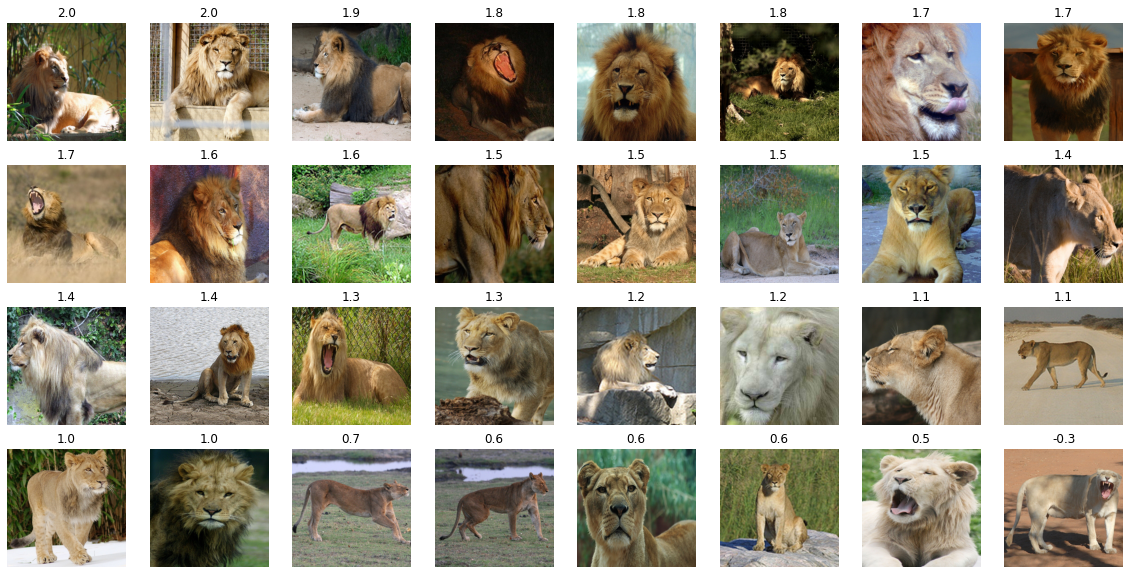

In [36]:
# implement function
image_gallery("lion", 4, 8)

#### Now that you're a little bit more familiar with working with image data, how do you think you would evaluate the similarity between two different images? 

* I think the method used in this lab is great for measuring similarity within each category but I don't know how applicable it would be when used to measure similarity for between categories because each rating is measured as how typical it is when representing its category. But in real life we're often encountered with images from various categories and we're "eavaluating similatities" between images from different categories. An odd-one-out method might be better at taking care of the context dependency.*